## Carregamento de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/processed/df_total.csv')
print(df.head())

C:\Users\mahno\AppData\Local\Temp\ipykernel_17016\2581145174.py:1: DtypeWarning: Columns (17,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/df_total.csv')


   codigo_vaga informacoes_basicas.data_requicisao  \
0         5185                          04-05-2021   
1         5184                          04-05-2021   
2         5184                          04-05-2021   
3         5184                          04-05-2021   
4         5184                          04-05-2021   

  informacoes_basicas.limite_esperado_para_contratacao  \
0                                         00-00-0000     
1                                         00-00-0000     
2                                         00-00-0000     
3                                         00-00-0000     
4                                         00-00-0000     

  informacoes_basicas.titulo_vaga informacoes_basicas.vaga_sap  \
0                Operation Lead -                          Não   
1          Consultor PP/QM Sênior                          Não   
2          Consultor PP/QM Sênior                          Não   
3          Consultor PP/QM Sênior                          Não

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56539 entries, 0 to 56538
Columns: 111 entries, codigo_vaga to cargo_atual.email_superior_imediato
dtypes: float64(18), int64(2), object(91)
memory usage: 47.9+ MB
None


In [9]:
df.columns

Index(['codigo_vaga', 'informacoes_basicas.data_requicisao',
       'informacoes_basicas.limite_esperado_para_contratacao',
       'informacoes_basicas.titulo_vaga', 'informacoes_basicas.vaga_sap',
       'informacoes_basicas.cliente',
       'informacoes_basicas.solicitante_cliente',
       'informacoes_basicas.empresa_divisao',
       'informacoes_basicas.requisitante',
       'informacoes_basicas.analista_responsavel',
       ...
       'cargo_atual.id_ibrati', 'cargo_atual.email_corporativo',
       'cargo_atual.cargo_atual', 'cargo_atual.projeto_atual',
       'cargo_atual.cliente', 'cargo_atual.unidade',
       'cargo_atual.data_admissao', 'cargo_atual.data_ultima_promocao',
       'cargo_atual.nome_superior_imediato',
       'cargo_atual.email_superior_imediato'],
      dtype='object', length=111)

In [5]:
# Quantidade de vagas únicas
print("Vagas únicas:", df['codigo_vaga'].nunique())

Vagas únicas: 14081


In [6]:
# Candidatos por vaga
candidatos_por_vaga = df['codigo_vaga'].value_counts()
print(candidatos_por_vaga.describe())

count    14081.000000
mean         4.015269
std          4.804337
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         25.000000
Name: count, dtype: float64


In [7]:
# Situação do candidato
print(df['situacao_candidato'].value_counts())

situacao_candidato
Prospect                          20005
Encaminhado ao Requisitante       16120
Inscrito                           3978
Não Aprovado pelo Cliente          3489
Contratado pela Decision           2757
Desistiu                           2349
Não Aprovado pelo RH               1765
Não Aprovado pelo Requisitante      765
Entrevista Técnica                  579
Sem interesse nesta vaga            576
Entrevista com Cliente              469
Em avaliação pelo RH                375
Contratado como Hunting             226
Aprovado                            209
Desistiu da Contratação              59
Documentação PJ                       4
Documentação CLT                      3
Recusado                              2
Documentação Cooperado                2
Encaminhar Proposta                   2
Proposta Aceita                       1
Name: count, dtype: int64


In [ ]:
#Classificação do status final
MAP_STATUS_FINAL = {
    # Contratado
    "contratado pela decision": "contratado",
    "contratado como hunting": "contratado",
    "aprovado": "contratado",
    "proposta aceita": "contratado",
    "encaminhar proposta": "contratado",
    "documentação pj": "contratado",
    "documentação clt": "contratado",
    "documentação cooperado": "contratado",

    # Negado
    "não aprovado pelo cliente": "negado",
    "não aprovado pelo rh": "negado",
    "não aprovado pelo requisitante": "negado",
    "recusado": "negado",
    "desistiu": "negado",
    "desistiu da contratação": "negado",
    "sem interesse nesta vaga": "negado",

    # Em processo
    "prospect": "em_processo",
    "inscrito": "em_processo",
    "encaminhado ao requisitante": "em_processo",
    "entrevista técnica": "em_processo",
    "entrevista com cliente": "em_processo",
    "em avaliação pelo rh": "em_processo",
    
}

df["status_simplificado"] = (
    df["situacao_candidato"].str.lower().map(MAP_STATUS_FINAL).fillna("vazio")
)

print(df["status_simplificado"].value_counts())


status_simplificado
em_processo    41526
negado          9005
contratado      3204
vazio           2804
Name: count, dtype: int64


In [11]:
for col in df.columns:
    print(col)

codigo_vaga
informacoes_basicas.data_requicisao
informacoes_basicas.limite_esperado_para_contratacao
informacoes_basicas.titulo_vaga
informacoes_basicas.vaga_sap
informacoes_basicas.cliente
informacoes_basicas.solicitante_cliente
informacoes_basicas.empresa_divisao
informacoes_basicas.requisitante
informacoes_basicas.analista_responsavel
informacoes_basicas.tipo_contratacao
informacoes_basicas.prazo_contratacao
informacoes_basicas.objetivo_vaga
informacoes_basicas.prioridade_vaga
informacoes_basicas.origem_vaga
informacoes_basicas.superior_imediato
informacoes_basicas.nome
informacoes_basicas.telefone
perfil_vaga.pais
perfil_vaga.estado
perfil_vaga.cidade
perfil_vaga.bairro
perfil_vaga.regiao
perfil_vaga.local_trabalho
perfil_vaga.vaga_especifica_para_pcd
perfil_vaga.faixa_etaria
perfil_vaga.horario_trabalho
perfil_vaga.nivel profissional
perfil_vaga.nivel_academico
perfil_vaga.nivel_ingles
perfil_vaga.nivel_espanhol
perfil_vaga.outro_idioma
perfil_vaga.areas_atuacao
perfil_vaga.princi

In [15]:
#Vagas duplicadas
df.groupby("codigo_vaga")["codigo_applicant"].nunique().value_counts().head(10)



codigo_applicant
1     2954
0     2804
2     1845
3     1601
4     1068
5      816
6      588
7      387
8      347
25     263
Name: count, dtype: int64

In [16]:
# Filtrar vagas que tiveram pelo menos 1 contratado
vagas_com_contratado = (
    df.loc[df["status_simplificado"]=="contratado"]
      .groupby("codigo_vaga")["codigo_applicant"]
      .nunique()
      .reset_index(name="n_contratados")
)

print("Total de vagas com contratado:", vagas_com_contratado.shape[0])
vagas_com_contratado.head()


Total de vagas com contratado: 2624


,codigo_vaga,n_contratados
0,2,1
1,13,7
2,14,1
3,15,3
4,16,1


In [17]:
# total de candidatos por vaga
cands_por_vaga = (
    df.groupby("codigo_vaga")["codigo_applicant"]
      .nunique()
      .reset_index(name="n_candidatos")
)

# juntar com info de contratados
vagas_info = cands_por_vaga.merge(vagas_com_contratado, on="codigo_vaga", how="left")
vagas_info["n_contratados"] = vagas_info["n_contratados"].fillna(0).astype(int)

# estatísticas
print(vagas_info["n_contratados"].value_counts())
print(vagas_info.describe())


n_contratados
0     11457
1      2304
2       208
3        59
4        21
5        10
6         8
10        5
7         3
9         3
8         2
11        1
Name: count, dtype: int64
        codigo_vaga  n_candidatos  n_contratados
count  14081.000000  14081.000000   14081.000000
mean    7105.029046      3.816135       0.227541
std     4108.161470      4.943897       0.592985
min        2.000000      0.000000       0.000000
25%     3544.000000      1.000000       0.000000
50%     7106.000000      2.000000       0.000000
75%    10650.000000      5.000000       0.000000
max    14222.000000     25.000000      11.000000


In [18]:
# Contagem absoluta
print(df["status_simplificado"].value_counts())

# Percentual (%)
print(df["status_simplificado"].value_counts(normalize=True)*100)


status_simplificado
em_processo    41526
negado          9005
contratado      3204
vazio           2804
Name: count, dtype: int64
status_simplificado
em_processo    73.446647
negado         15.927059
contratado      5.666885
vazio           4.959409
Name: proportion, dtype: float64


In [20]:
vagas_com_contratado = (
    df.query("status_simplificado == 'contratado'")
      .groupby("codigo_vaga")["codigo_applicant"]
      .nunique()
)

print("Total de vagas com contratado:", vagas_com_contratado.shape[0])
print("Distribuição de nº de contratados por vaga:")
print(vagas_com_contratado.value_counts().head(10))


Total de vagas com contratado: 2624
Distribuição de nº de contratados por vaga:
codigo_applicant
1     2304
2      208
3       59
4       21
5       10
6        8
10       5
7        3
9        3
8        2
Name: count, dtype: int64


        codigo_vaga  n_candidatos  n_contratados  taxa_contratacao
count  14081.000000  14081.000000   14081.000000      11277.000000
mean    7105.029046      3.816135       0.227541          0.138093
std     4108.161470      4.943897       0.592985          0.314310
min        2.000000      0.000000       0.000000          0.000000
25%     3544.000000      1.000000       0.000000          0.000000
50%     7106.000000      2.000000       0.000000          0.000000
75%    10650.000000      5.000000       0.000000          0.000000
max    14222.000000     25.000000      11.000000          1.000000


<Axes: >

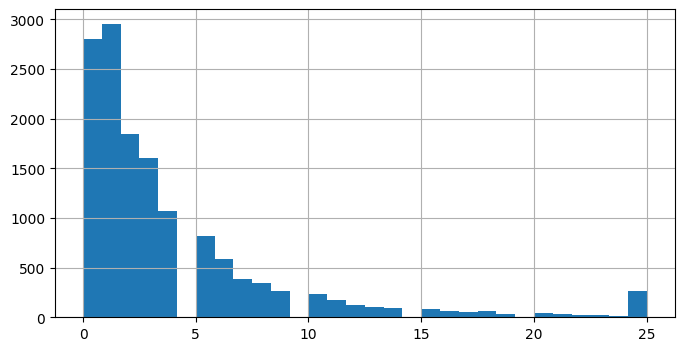

In [22]:
# número de candidatos únicos por vaga
cands_por_vaga = (
    df.groupby("codigo_vaga")["codigo_applicant"]
      .nunique()
      .reset_index(name="n_candidatos")
)

# número de contratados por vaga
contratados_por_vaga = (
    df.query("status_simplificado == 'contratado'")
      .groupby("codigo_vaga")["codigo_applicant"]
      .nunique()
      .reset_index(name="n_contratados")
)

# junta as duas informações
vaga_stats = cands_por_vaga.merge(contratados_por_vaga, on="codigo_vaga", how="left")
vaga_stats["n_contratados"] = vaga_stats["n_contratados"].fillna(0).astype(int)

# taxa de contratação por vaga
vaga_stats["taxa_contratacao"] = vaga_stats["n_contratados"] / vaga_stats["n_candidatos"]

# estatísticas gerais
print(vaga_stats.describe())

# distribuição de candidatos por vaga
vaga_stats["n_candidatos"].hist(bins=30, figsize=(8,4))


### Analise Exploratoria

#### Qualidade e disponibilidade de dados

In [ ]:
#Percentual de missing por coluna
missing = (
    df.isna().mean()
      .sort_values(ascending=False)
      .to_frame("missing_rate")
)

print(missing.head(30))   # top 20 colunas mais vazias


                                                missing_rate
cargo_atual.email_superior_imediato                 1.000000
informacoes_pessoais.url_linkedin                   1.000000
informacoes_pessoais.skype                          1.000000
cargo_atual.nome_superior_imediato                  1.000000
cargo_atual.projeto_atual                           1.000000
cargo_atual.email_corporativo                       1.000000
informacoes_profissionais.qualificacoes             1.000000
informacoes_profissionais.experiencias              1.000000
informacoes_pessoais.cpf                            1.000000
informacoes_pessoais.email_secundario               1.000000
informacoes_pessoais.facebook                       1.000000
informacoes_pessoais.telefone_recado                1.000000
infos_basicas.telefone_recado                       1.000000
cv_en                                               1.000000
informacoes_basicas.telefone                        0.999947
cargo_atual.id_ibrati   

In [25]:
#cardinalidade
nunique = df.nunique().sort_values(ascending=False)
print(nunique.head(20))   # top 20 mais variados
print(nunique.tail(20))   # top 20 quase constantes

codigo_applicant                                      29399
nome_candidato                                        26241
infos_basicas.codigo_profissional                     23457
infos_basicas.data_atualizacao                        23429
infos_basicas.data_criacao                            23414
infos_basicas.email                                   23312
informacoes_pessoais.email                            23312
informacoes_pessoais.telefone_celular                 23249
infos_basicas.telefone                                23249
infos_basicas.nome                                    23188
informacoes_pessoais.nome                             23188
cv_pt                                                 21937
codigo_vaga                                           14081
informacoes_basicas.titulo_vaga                       12452
comentario                                            12190
perfil_vaga.principais_atividades                     11708
perfil_vaga.competencia_tecnicas_e_compo

In [26]:


# Função para classificar o tipo de coluna
def tipo_coluna(s: pd.Series) -> str:
    if pd.api.types.is_numeric_dtype(s):
        return "numeric"
    if pd.api.types.is_datetime64_any_dtype(s):
        return "datetime"
    if s.dtype == "object" and s.astype(str).str.len().mean() > 50:
        return "text"
    return "categorical"

# Construir relatório
col_info = pd.DataFrame({
    "coluna": df.columns,
    "tipo": [tipo_coluna(df[c]) for c in df.columns],
    "missing_rate": df.isna().mean().round(3).values,
    "nunique": [df[c].nunique(dropna=True) for c in df.columns]
})

# Ordenar para facilitar a leitura
col_info = col_info.sort_values(
    ["tipo", "missing_rate", "nunique"],
    ascending=[True, False, False]
).reset_index(drop=True)

# Exibir as 20 primeiras linhas como amostra
print(col_info.head(20))



                                            coluna         tipo  missing_rate  \
0                     informacoes_basicas.telefone  categorical         1.000   
1                          cargo_atual.cargo_atual  categorical         0.999   
2                              cargo_atual.cliente  categorical         0.999   
3                              cargo_atual.unidade  categorical         0.999   
4                        beneficios.valor_compra_2  categorical         0.997   
5     informacoes_profissionais.nivel_profissional  categorical         0.995   
6   formacao_e_idiomas.instituicao_ensino_superior  categorical         0.986   
7                         informacoes_basicas.nome  categorical         0.986   
8                     perfil_vaga.horario_trabalho  categorical         0.986   
9                   formacao_e_idiomas.outro_curso  categorical         0.985   
10                       cargo_atual.data_admissao  categorical         0.984   
11                cargo_atua

##### Separação e Limpeza Inicial

In [ ]:
# ===============================================================
#  PARTE 1 - Separação em dois datasets
# ===============================================================
# Objetivo: Criar dois conjuntos de dados, alinhados com nossos dois problemas de negócio.
#  - Dataset A (Triagem): prever se o candidato vale seguir no processo (entrevista).
#  - Dataset B (Contratação): prever se o candidato será contratado ao final do processo.
# ===============================================================

# Dataset A - Triagem
df_A = df[df["status_simplificado"] != "vazio"].copy()
df_A["alvo_A"] = df_A["status_simplificado"].map(
    lambda x: 1 if x in ["contratado", "em_processo"] else 0
)
print("Dataset A:", df_A.shape, "Proporção de positivos:", round(df_A["alvo_A"].mean(), 3))

# Dataset B - Contratação
df_B = df[df["status_simplificado"].isin(["contratado","negado"])].copy()
df_B["alvo_B"] = (df_B["status_simplificado"] == "contratado").astype(int)
print("Dataset B:", df_B.shape, "Proporção de positivos:", round(df_B["alvo_B"].mean(), 3))



Dataset A: (53735, 113) Proporção de positivos: 0.832
Dataset B: (12209, 113) Proporção de positivos: 0.262


In [ ]:

# ===============================================================
# PARTE 2 - Relatório de colunas
# ===============================================================
# Objetivo: Avaliar a qualidade das colunas em termos de tipo, preenchimento e utilidade.
# Isso nos ajuda a decidir quais colunas manter, descartar ou tratar separadamente.
# Critérios principais:
#   - Missing > 70% → provavelmente descartar
#   - Nununique = 1 (constante) → descartar
#   - IDs e chaves técnicas → descartar
#   - Colunas pós-desfecho (com "contratado", "aprovado", etc.) → descartar para evitar vazamento
# ===============================================================

def gerar_relatorio(df):
    def tipo_coluna(s):
        import pandas as pd
        if pd.api.types.is_numeric_dtype(s): return "numeric"
        if pd.api.types.is_datetime64_any_dtype(s): return "datetime"
        if s.dtype == "object" and s.astype(str).str.len().mean() > 50:
            return "text"
        return "categorical"

    col_info = pd.DataFrame({
        "coluna": df.columns,
        "tipo": [tipo_coluna(df[c]) for c in df.columns],
        "missing_rate": df.isna().mean().round(3).values,
        "nunique": [df[c].nunique(dropna=True) for c in df.columns]
    })

    return col_info.sort_values(["tipo","missing_rate"], ascending=[True, False])

# Relatórios para A e B
rel_A = gerar_relatorio(df_A)
rel_B = gerar_relatorio(df_B)

print("=== Dataset A (Triagem) ===")
print(rel_A.head(20))
print("=== Dataset B (Contratação) ===")
print(rel_B.head(20))

# Salvar para documentação
rel_A.to_csv("../data/interim/relatorio_dataset_A.csv", index=False)
rel_B.to_csv("../data/interim/relatorio_dataset_B.csv", index=False)




=== Dataset A (Triagem) ===
                                             coluna         tipo  \
17                     informacoes_basicas.telefone  categorical   
103                         cargo_atual.cargo_atual  categorical   
105                             cargo_atual.cliente  categorical   
106                             cargo_atual.unidade  categorical   
40                        beneficios.valor_compra_2  categorical   
89     informacoes_profissionais.nivel_profissional  categorical   
16                         informacoes_basicas.nome  categorical   
26                     perfil_vaga.horario_trabalho  categorical   
94   formacao_e_idiomas.instituicao_ensino_superior  categorical   
100                  formacao_e_idiomas.outro_curso  categorical   
107                       cargo_atual.data_admissao  categorical   
108                cargo_atual.data_ultima_promocao  categorical   
86          informacoes_profissionais.certificacoes  categorical   
44              info

In [33]:
# ===============================================================
#  PARTE 3 - Limpeza automática inicial
# ===============================================================
# Objetivo: aplicar critérios objetivos para já eliminar colunas inúteis.
# Passos:
#   1. Remover IDs e chaves técnicas
#   2. Remover colunas com missing > 70%
#   3. Remover colunas constantes
#   4. Remover colunas que possam gerar vazamento de informação
# ===============================================================

def limpar_colunas(df, relatorio):
    # 1. Identificar colunas de ID/chave
    ids = [c for c in df.columns if "codigo" in c.lower() or "id" in c.lower()]
    
    # 2. Colunas com muito missing
    missing_cols = relatorio.query("missing_rate > 0.7")["coluna"].tolist()
    
    # 3. Colunas constantes
    const_cols = relatorio.query("nunique == 1")["coluna"].tolist()

    
    drop_cols = list(set(missing_cols + const_cols))
    print("Colunas a remover:", drop_cols)
    
    return df.drop(columns=drop_cols, errors="ignore")

# Aplicar limpeza
df_A_clean = limpar_colunas(df_A, rel_A)
df_B_clean = limpar_colunas(df_B, rel_B)

print("Dataset A após limpeza:", df_A_clean.shape)
print("Dataset B após limpeza:", df_B_clean.shape)


Colunas a remover: ['informacoes_pessoais.download_cv', 'informacoes_basicas.nome_substituto', 'formacao_e_idiomas.nivel_ingles', 'informacoes_profissionais.outras_certificacoes', 'informacoes_basicas.nome', 'informacoes_profissionais.qualificacoes', 'formacao_e_idiomas.nivel_academico', 'formacao_e_idiomas.nivel_espanhol', 'informacoes_profissionais.remuneracao', 'infos_basicas.sabendo_de_nos_por', 'cargo_atual.projeto_atual', 'cargo_atual.nome_superior_imediato', 'formacao_e_idiomas.instituicao_ensino_superior', 'beneficios.valor_compra_2', 'cargo_atual.unidade', 'cargo_atual.cargo_atual', 'cargo_atual.cliente', 'perfil_vaga.habilidades_comportamentais_necessarias', 'informacoes_basicas.data_inicial', 'infos_basicas.telefone_recado', 'cargo_atual.email_corporativo', 'informacoes_basicas.superior_imediato', 'cargo_atual.data_admissao', 'informacoes_profissionais.certificacoes', 'informacoes_pessoais.pcd', 'informacoes_pessoais.email_secundario', 'formacao_e_idiomas.ano_conclusao', 'fo

In [34]:
# ===============================================================
#  PARTE 4 - Salvamento dos datasets limpos
# ===============================================================
# Os arquivos ficam em data/interim/ porque são intermediários:
#   - Já não são raw (originais), mas ainda não estão prontos para modelagem.
#   - Depois, quando fizermos feature engineering, salvamos em data/processed/.
# ===============================================================

df_A_clean.to_csv("../data/interim/dataset_triagem.csv", index=False)
df_B_clean.to_csv("../data/interim/dataset_contratacao.csv", index=False)

print("Arquivos salvos em data/interim/:")
print(" - dataset_triagem.csv")
print(" - dataset_contratacao.csv")
print(" - relatorio_dataset_triagem.csv")
print(" - relatorio_dataset_contratacao.csv")

Arquivos salvos em data/interim/:
 - dataset_triagem.csv
 - dataset_contratacao.csv
 - relatorio_dataset_triagem.csv
 - relatorio_dataset_contratacao.csv
